## youtube爬蟲

In [1]:
!pip install XlsxWriter

In [44]:
api_key = "your_own_api_key"

from apiclient.discovery import build
youtube = build('youtube', 'v3', developerKey=api_key)
import pandas as pd
import xlsxwriter
writer = pd.ExcelWriter('爬蟲資料.xlsx', engine='xlsxwriter')

In [3]:
def scrape_comments_from_videos(id_dict, Sheet_name):
  count = 0
  box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]
  for k in id_dict:
    try:
      data = youtube.commentThreads().list(part='snippet', videoId=k, maxResults='100', textFormat="plainText").execute()
      count += 1
      for i in data["items"]:
        name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
        comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
        published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
        likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
        replies = i["snippet"]['totalReplyCount']

        box.append([name, comment, published_at, likes, replies])

        totalReplyCount = i["snippet"]['totalReplyCount']

        if totalReplyCount > 0:

          parent = i["snippet"]['topLevelComment']["id"]

          data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()

          for i in data2["items"]:
            name = i["snippet"]["authorDisplayName"]
            comment = i["snippet"]["textDisplay"]
            published_at = i["snippet"]['publishedAt']
            likes = i["snippet"]['likeCount']
            replies = ""

            box.append([name, comment, published_at, likes, replies])

      while ("nextPageToken" in data):

        data = youtube.commentThreads().list(part='snippet', videoId=k, pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()

        for i in data["items"]:
          name = i["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
          comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
          published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']
          likes = i["snippet"]['topLevelComment']["snippet"]['likeCount']
          replies = i["snippet"]['totalReplyCount']

          box.append([name, comment, published_at, likes, replies])

          totalReplyCount = i["snippet"]['totalReplyCount']

          if totalReplyCount > 0:

              parent = i["snippet"]['topLevelComment']["id"]

              data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                textFormat="plainText").execute()

              for i in data2["items"]:
                  name = i["snippet"]["authorDisplayName"]
                  comment = i["snippet"]["textDisplay"]
                  published_at = i["snippet"]['publishedAt']
                  likes = i["snippet"]['likeCount']
                  replies = ''

                  box.append([name, comment, published_at, likes, replies])
      df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Time': [i[2] for i in box],
                       'Likes': [i[3] for i in box], 'Reply Count': [i[4] for i in box]})
      df.to_excel(writer ,sheet_name=Sheet_name, index=False, header=False)
      print("Success")
    except:
      print('Failed')
      continue
  print(count)

In [ ]:
def search_all_id(query):
  search_response = youtube.search().list(
              q= query,
              type='video',
              part='id,snippet',
              publishedAfter='2021-05-18T00:00:00Z',
              publishedBefore='2021-06-24T00:00:00Z',
              maxResults=20
          ).execute()
  for i in search_response['items']:
    if i['id']['videoId'] not in id_dict[i['snippet']['publishedAt'][:10]]:
      id_dict[i['snippet']['publishedAt'][:10]].append(i['id']['videoId'])
  while ("nextPageToken" in search_response):
    search_response = youtube.search().list(q=query, part=part, pageToken=search_response["nextPageToken"],
                                            maxResults=maxResults, type=type,publishedAfter=publishedAfter,
                                            publishedBefore=publishedBefore).execute()
    for i in search_response['items']:
      if i['id']['videoId'] not in id_dict[i['snippet']['publishedAt'][:10]]:
        id_dict[i['snippet']['publishedAt'][:10]].append(i['id']['videoId'])

In [4]:
youtube = build('youtube', 'v3', developerKey=api_key)
search_response = youtube.search().list(
            q='柯文哲',
            type='video',
            part='id,snippet',
            publishedAfter='2023-06-30T00:00:00Z',
            publishedBefore='2023-12-22T00:00:00Z',
            maxResults=20
        ).execute()

In [5]:
print(search_response.keys())

dict_keys(['kind', 'etag', 'nextPageToken', 'regionCode', 'pageInfo', 'items'])


In [6]:
search_response['items'][1]['id']['videoId']

'zkrkLuvn8vk'

In [ ]:
search_response['items']

In [8]:
id_dict = []
for i in search_response['items']:
  id_dict.append(i['id']['videoId'])

In [ ]:
id_dict

In [10]:
writer = pd.ExcelWriter('爬蟲資料.xlsx', engine='xlsxwriter')
scrape_comments_from_videos(id_dict, '柯文哲前二十部')
writer.save()
writer.close()

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
20


<ipython-input-10-b4d7bae25ce0>:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/usr/local/lib/python3.10/dist-packages/xlsxwriter/workbook.py:368: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


## 匯入

In [11]:
import re
import pandas as pd
import xlsxwriter

In [13]:
df = pd.read_excel('/content/爬蟲資料.xlsx')

In [15]:
df

,Name,Comment,Time,Likes,Reply Count
0,@jamham4048,一個沒有改變決心只想換人去撈，一個上一任用過全都跳票不敢再提了怕被抓出來鞭。講政見搞得跟記者...,2023-12-23T05:32:59Z,0,0.0
1,@asd5772335,唉\n台派又只能含淚投民進黨了,2023-12-23T04:09:26Z,0,0.0
2,@James-pm4hf,捐給我吧！我來設個貪德不厭亭！不孝子⋯！說老爸留給泥的只有貧窮！想不到泥沒念書⋯！以貪為座佑...,2023-12-23T02:58:41Z,2,0.0
3,@aaronli7456,拿別人的家人出來酸....沒救了，賴皮,2023-12-23T01:58:37Z,1,0.0
4,@shincha0117,某人為了自己的違建\n哭超多次\n還好意思說,2023-12-23T01:37:16Z,0,0.0
...,...,...,...,...,...
17864,@K.-J._S.,你們是心虛的會刪不利你們柯師父的留言。\n巧言如簧，顏之厚矣。\n柯文哲自己半推半就的到國民...,2023-12-19T23:13:12Z,0,NaN
17865,@k925598194,這次不給過 基本的洗門風是必須的吧,2023-12-20T02:12:16Z,0,NaN
17866,@heyawong2616,１４５０好害怕，笑死,2023-12-20T03:58:52Z,0,NaN
17867,@K.-J._S.,賴清德老家位於新北萬里六坑煤礦旁，其實是礦工工寮，也是他出生長大的地方。房子在民國60年左右...,2023-12-20T07:12:02Z,0,NaN


## 資料清理

In [ ]:
# 把留言全部轉成string
df['Comment'] = df['Comment'].astype(str)
# 篩除同樣人之重複留言，保留一筆
df = df.drop_duplicates(subset=['Name','Comment'],keep='first')
# 去掉換行、空格
df['Comment'] = df['Comment'].str.replace("😍","")
df['Comment'] = df['Comment'].str.replace("😅","")
df['Comment'] = df['Comment'].str.replace("😆","")
df['Comment'] = df['Comment'].str.replace("\n","").replace("\r","")

In [17]:
df

,Name,Comment,Time,Likes,Reply Count
0,@jamham4048,一個沒有改變決心只想換人去撈，一個上一任用過全都跳票不敢再提了怕被抓出來鞭。講政見搞得跟記者...,2023-12-23T05:32:59Z,0,0.0
1,@asd5772335,唉台派又只能含淚投民進黨了,2023-12-23T04:09:26Z,0,0.0
2,@James-pm4hf,捐給我吧！我來設個貪德不厭亭！不孝子⋯！說老爸留給泥的只有貧窮！想不到泥沒念書⋯！以貪為座佑...,2023-12-23T02:58:41Z,2,0.0
3,@aaronli7456,拿別人的家人出來酸....沒救了，賴皮,2023-12-23T01:58:37Z,1,0.0
4,@shincha0117,某人為了自己的違建哭超多次還好意思說,2023-12-23T01:37:16Z,0,0.0
...,...,...,...,...,...
17861,@heyawong2616,節目單0:01 揭弊記者會 | 黃國昌_x000D_1:14:40 國家治理記者會(重播...,2023-12-19T13:25:46Z,53,7.0
17862,@k925598194,拆不拆不是很重要了 正常要出來洗門風吧輪到自己就輕輕帶過要大力抨擊自己不然怎麼對得起民眾黨教...,2023-12-19T17:43:00Z,0,NaN
17865,@k925598194,這次不給過 基本的洗門風是必須的吧,2023-12-20T02:12:16Z,0,NaN
17866,@heyawong2616,１４５０好害怕，笑死,2023-12-20T03:58:52Z,0,NaN


In [19]:
!pip install hanziconv
from hanziconv import HanziConv
# 簡轉繁
df =df[df['Comment']!=df['Comment'].apply(HanziConv.toSimplified)]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.8/276.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hanziconv: filename=hanziconv-0.3.2-py2.py3-none-any.whl size=23210 sha256=d085b31baa685a1ab9a0d9abe8a893dccc07cc1e6287a02c0d5bf50a500af38e
  Stored in directory: /root/.cache/pip/wheels/62/5a/e5/779585d31b977c0fa445b649a256d1fae60728fdc21c1373dc
Successfully built hanziconv


In [21]:
# re_keywords(放欲篩選的關鍵字)，調成正則表達式提供模糊檢索
kp_keywords = ["柯p","柯","柯文哲","柯P","柯醫生","阿北","kp","民眾黨","台民黨"]
def re_keywords(keywords):
  pattern = re.compile( '|' .join(keywords))
  return pattern
# 指定關鍵字後進行篩選
def find_keywords(words):
  return pattern.search(words) is not None
# 把留言時間修成想要的格式(2023-0x-xx)
def shorten_time_str(text):
  text = text[:10]
  return text

In [22]:
pattern = re_keywords(kp_keywords)
df2 = df[df['Comment'].apply(find_keywords)]
df2['Time'] = df2['Time'].apply(shorten_time_str)
df2

<ipython-input-22-42ea01167e28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = df2['Time'].apply(shorten_time_str)


,Name,Comment,Time,Likes,Reply Count
7,@user-ew7px4dm7g,台灣有賴先生這樣的領導會哭出來「唯一支持柯文哲」,2023-12-23,0,0.0
8,@user-rb6ps3ex9l,賴哭或柯家人哭我都可以理解，那個姓鄭的名嘴是在哭殺小。,2023-12-22,0,0.0
10,@user-ed7ib3my4i,賴清德說的沒錯啊徐春鷹是柯文哲副手 他是中國跟台灣雙重國籍 還她嗎想入國會? 引狼入室?馬文...,2023-12-22,0,0.0
27,@user-fd1yg3hm7t,誰是為台灣著想的侯選人，真是一目瞭然，唯一支持柯盈配.,2023-12-22,1,0.0
33,@PoPi-zf3wi,賴清德的政見著眼於人工智慧、低軌道衛星、綠能、量子電腦等下一世代產業，不僅為台灣的持續經濟成...,2023-12-22,0,0.0
...,...,...,...,...,...
17853,@user-wu2xk3ou2q,@@szuchaowang6008 6666666恭喜你不用再嗑迷幻民調催眠自已天下無敵，信...,2023-12-20,0,NaN
17855,@user-wu2xk3ou2q,@@k925598194 違法炒農地大亨神棍柯七粒根本沒誠意，只是把遊覽車派出去跑跑嘛，租...,2023-12-20,0,NaN
17861,@heyawong2616,節目單0:01 揭弊記者會 | 黃國昌_x000D_1:14:40 國家治理記者會(重播...,2023-12-19,53,7.0
17862,@k925598194,拆不拆不是很重要了 正常要出來洗門風吧輪到自己就輕輕帶過要大力抨擊自己不然怎麼對得起民眾黨教...,2023-12-19,0,NaN


In [23]:
##remove stop words
!wget https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt -O stopwords_zh-tw.txt

--2023-12-23 07:56:39--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8125 (7.9K) [text/plain]
Saving to: ‘stopwords_zh-tw.txt’

stopwords_zh-tw.txt 100%[===================>]   7.93K  --.-KB/s    in 0s      

2023-12-23 07:56:39 (58.6 MB/s) - ‘stopwords_zh-tw.txt’ saved [8125/8125]



In [24]:
import pandas as pd
import jieba

with open("stopwords_zh-tw.txt", encoding="utf-8") as fin:
  stopwords = fin.read().split("\n")[1:]

In [ ]:
# !gdown --id '1dKdptxdLsHG3GVH9SSI-2n5Ht-3sZepB' ## 這個是自訂義jieba斷詞的txt檔
# jieba.load_userdict('/content/_____.txt')

In [35]:
# 用來隨時新增停用字
another_stopword = ["\\n","😋","😅","\r"," "," ，","x000D"]
for i in another_stopword:
  stopwords.append(i)

In [36]:
import unicodedata # for removing Chinese puctuation
from collections import Counter
def remove_stopWords(words):
    out = []
    for word in words:
        if word not in stopwords:
          out.append(word)
    return out

def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out

In [ ]:
df2['token_text'] = df2['Comment'].apply(lambda x:list(jieba.cut(x)))
df2['cleaned'] = df2['token_text'].apply(remove_stopWords)
df2['cleaned'] = df2['cleaned'].apply(remove_punc_by_unicode)

In [38]:
df2

,Name,Comment,Time,Likes,Reply Count,token_text,cleaned
7,@user-ew7px4dm7g,台灣有賴先生這樣的領導會哭出來「唯一支持柯文哲」,2023-12-23,0,0.0,"[台灣, 有賴, 先生, 這樣, 的, 領導會, 哭, 出來, 「, 唯一, 支持, 柯文,...","[台灣, 有賴, 先生, 領導會, 哭, 唯一, 支持, 柯文, 哲]"
8,@user-rb6ps3ex9l,賴哭或柯家人哭我都可以理解，那個姓鄭的名嘴是在哭殺小。,2023-12-22,0,0.0,"[賴哭, 或, 柯, 家人, 哭, 我, 都, 可以, 理解, ，, 那個, 姓, 鄭, 的...","[賴哭, 柯, 家人, 哭, 理解, 姓, 鄭, 名嘴, 哭, 殺, 小]"
10,@user-ed7ib3my4i,賴清德說的沒錯啊徐春鷹是柯文哲副手 他是中國跟台灣雙重國籍 還她嗎想入國會? 引狼入室?馬文...,2023-12-22,0,0.0,"[賴清德, 說, 的, 沒錯, 啊, 徐春鷹, 是, 柯文, 哲, 副手, , 他, 是,...","[賴清德, 說, 沒錯, 徐春鷹, 柯文, 哲, 副手, 中國, 台灣, 雙重, 國籍, 想..."
27,@user-fd1yg3hm7t,誰是為台灣著想的侯選人，真是一目瞭然，唯一支持柯盈配.,2023-12-22,1,0.0,"[誰, 是, 為, 台灣, 著, 想, 的, 侯選人, ，, 真是, 一目, 瞭然, ，, ...","[台灣, 想, 侯選人, 真是, 一目, 瞭然, 唯一, 支持, 柯盈配]"
33,@PoPi-zf3wi,賴清德的政見著眼於人工智慧、低軌道衛星、綠能、量子電腦等下一世代產業，不僅為台灣的持續經濟成...,2023-12-22,0,0.0,"[賴清德, 的, 政見, 著眼, 於, 人工智慧, 、, 低軌, 道, 衛星, 、, 綠能,...","[賴清德, 政見, 著眼, 人工智慧, 低軌, 道, 衛星, 綠能, 量子, 電腦, 下, ..."
...,...,...,...,...,...,...,...
17853,@user-wu2xk3ou2q,@@szuchaowang6008 6666666恭喜你不用再嗑迷幻民調催眠自已天下無敵，信...,2023-12-20,0,NaN,"[@, @, szuchaowang6008, , 6666666, 恭喜, 你, 不用,...","[szuchaowang6008, 6666666, 恭喜, 不用, 再, 嗑, 迷幻, 民..."
17855,@user-wu2xk3ou2q,@@k925598194 違法炒農地大亨神棍柯七粒根本沒誠意，只是把遊覽車派出去跑跑嘛，租...,2023-12-20,0,NaN,"[@, @, k925598194, , , 違法, 炒, 農地, 大亨, 神棍, 柯,...","[k925598194, 違法, 炒, 農地, 大亨, 神棍, 柯, 七粒, 根本, 沒誠意..."
17861,@heyawong2616,節目單0:01 揭弊記者會 | 黃國昌_x000D_1:14:40 國家治理記者會(重播...,2023-12-19,53,7.0,"[節目, 單, 0, :, 01, , , , 揭弊, 記者, 會, , |, ,...","[節目, 01, 揭弊, 記者, 黃, 國昌, 14, 40, 國家, 治理, 記者, 重播..."
17862,@k925598194,拆不拆不是很重要了 正常要出來洗門風吧輪到自己就輕輕帶過要大力抨擊自己不然怎麼對得起民眾黨教...,2023-12-19,0,NaN,"[拆, 不, 拆, 不是, 很, 重要, 了, , 正常, 要, 出來, 洗門風, 吧, ...","[拆, 拆, 重要, 正常, 洗門風, 輪, 輕輕帶, 過要, 大力, 抨擊, 起民眾, 黨..."


## 跑詞頻

In [39]:
from collections import Counter
word_count = Counter()

for tokens in df2['cleaned']:
    for tok in tokens:
        try:
            if len(tok) > 1 and not unicodedata.category(tok[0]).startswith('P'):
                word_count[tok] += 1
        except:
            print("%s\tTypeError: category() argument must be a unicode character, not str"%(tok))
# for k, v in word_count.most_common(30):
#     print(k, '\t', v)

df_tmp = pd.DataFrame(list(word_count.most_common(30)), columns = ['word', 'n'])
df_tmp

,word,n
0,柯文,2371
1,台灣,1429
2,阿北,1290
3,支持,889
4,真的,753
5,加油,632
6,藍綠,539
7,總統,495
8,一個,439
9,一定,406


## 視覺化

In [ ]:
# download
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
# unzip
!unzip "NotoSansCJKtc-hinted.zip"

In [41]:
import matplotlib as mpl

# choose a font style and move to your font library
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/


# add custom fonts to Matplotlib
font_path = "/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf"
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family='Noto Sans CJK TC')

mv: cannot stat 'NotoSansCJKtc-Regular.otf': No such file or directory


<Axes: xlabel='n', ylabel='word'>

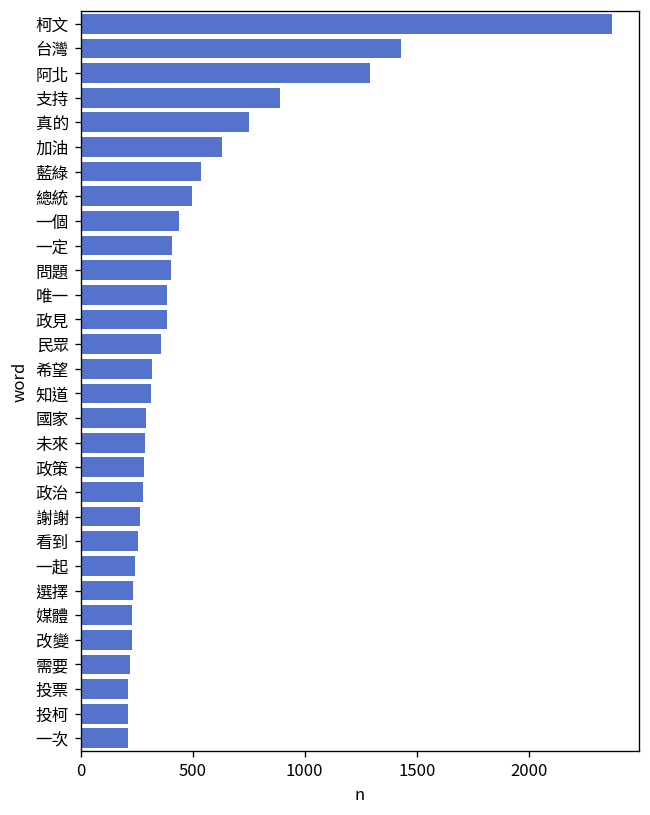

In [42]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8), dpi=120)
df_data = df_tmp.sort_values('n', ascending=False)
#     print(df_data)
sns.barplot(x='n',
            y='word',
            data=df_data,
            label='word',
            color='royalblue',
            )

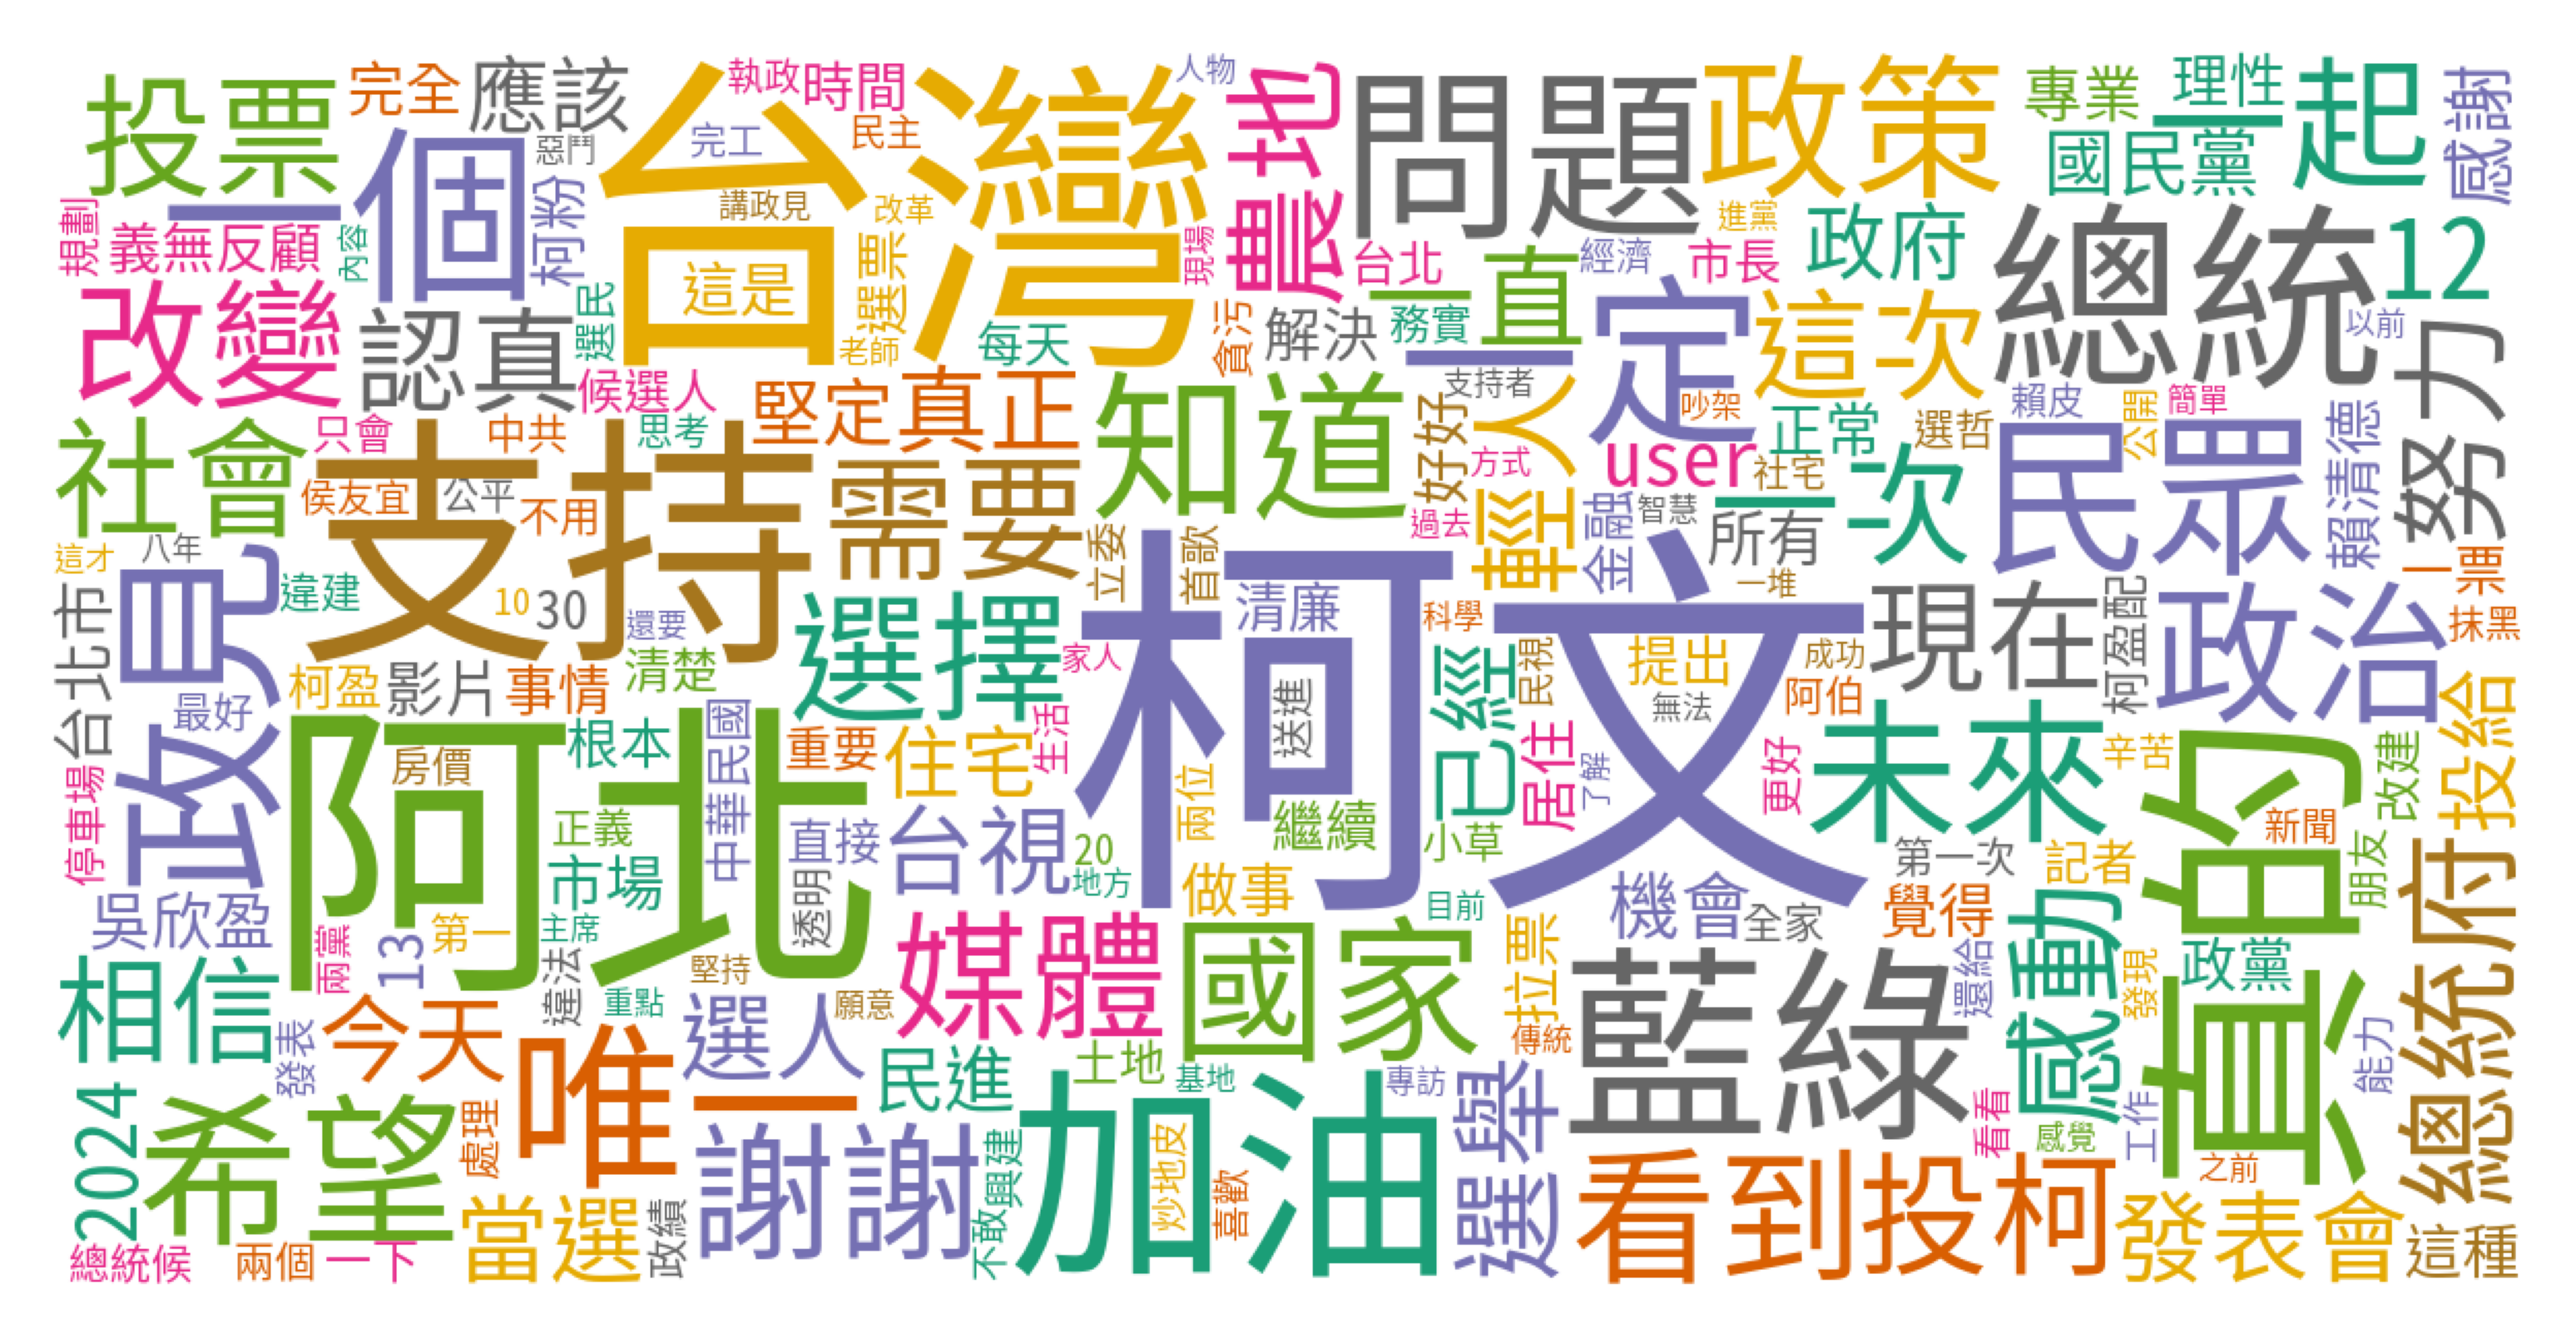

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

font_path = '/content/NotoSansMonoCJKtc-Regular.otf'
# back_color = imageio.imread("./taiwan.png")
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, background_color="white",
                      font_path=font_path, colormap="Dark2").generate_from_frequencies(word_count)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()